# Project: Investigate The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb).  
We want to explore what kinds of properties are associated with movies that have high revenues:  
1- Does 'budget' property associate with movies that have high revenues?
2- Does 'Popularity' property associate with movies that have high revenues?
3- Does 'Release year' property associate with movies that have high revenues?
4- Does 'Vote average' property associate with movies that have high revenues?

In [56]:
#import needed statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [57]:
# Upload the file and put it in the variable "df"
df = pd.read_csv('tmdb-movies.csv')

# Showing first five rows of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
# checking for dublicated elements
print('dublicated elements: ',sum(df.duplicated()))

dublicated elements:  1


> We can see that we have one duplicated element in our dataset

In [59]:
# Checking for NAN values in the revenue adj column
print("No of rows with NAN values in the revenue adj column: ", df['revenue_adj'].isna().sum())

# Checking for zero values in the revenue adj column
print("No of rows with zero values in the revenue adj column: ", df[(df['revenue_adj']==0)].shape[0])

No of rows with NAN values in the revenue adj column:  0
No of rows with zero values in the revenue adj column:  6016


> We can see that we don't have NAN values, but we have 6016 rows with zero values in the revenue adj column

### Data Cleaning
> - Removing dublicated elements from the data.
> - Removing rows with zero values in the revenue_adj column.

### 1. Removing dublicated elements from the data.

In [60]:
df.drop_duplicates(inplace = True)

### 2. Removing rows with zero values in the revenue adj column.

In [61]:
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NAN)
df.dropna(subset =['revenue_adj'], inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis



### 1- Does 'budget' property associate with movies that have high revenues?

#### Exploring 'Revenue adj' data

count    4.849000e+03
mean     1.151009e+08
std      1.988557e+08
min      2.370705e+00
25%      1.046585e+07
50%      4.395666e+07
75%      1.316482e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

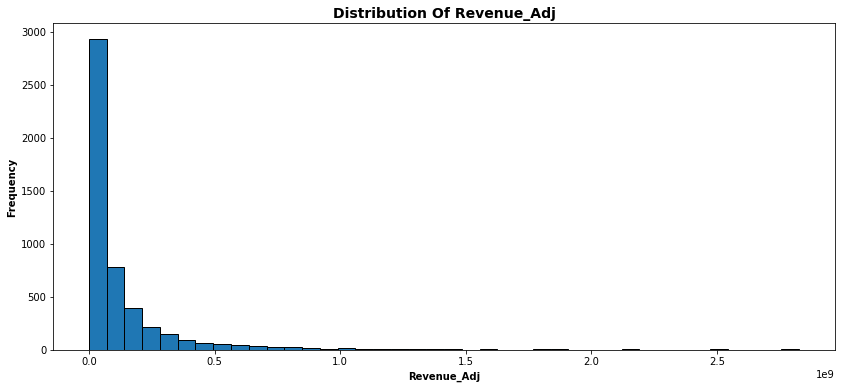

In [62]:
def HistPlot(var,density=False):
    '''
    This function plots a histogram for the variable we want to explore
    '''
    # plot
    df[var].hist(grid=False, bins=40, density=density, edgecolor='black', figsize=(14,6));
    # Add title and format it
    plt.title(f'Distribution of {var}'.title(), fontsize=14, weight='bold')
    # Add x label and format it
    plt.xlabel(var.title(), fontsize=10, weight='bold')
    # Add y label and format it
    plt.ylabel('Frequency', fontsize=10, weight='bold')
    
# Plotting a histogram for Revenue adj   
HistPlot('revenue_adj')

df.revenue_adj.describe()                                                                                                          

#### Studying the relationship between 'revenue adj' and 'budget_adj'

Correlation between "revenue adj" and "budget_adj":  0.57


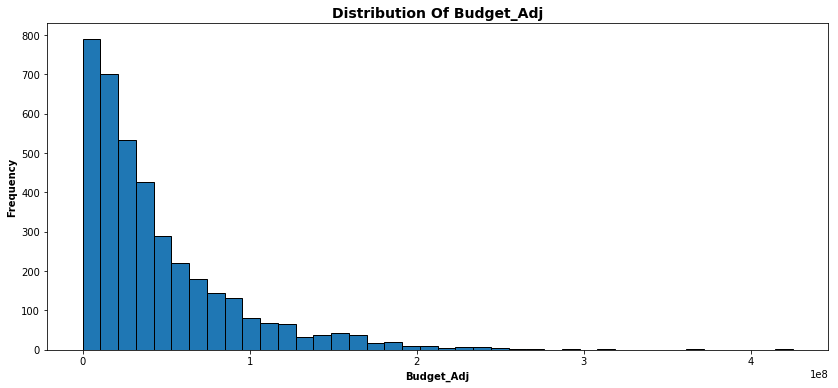

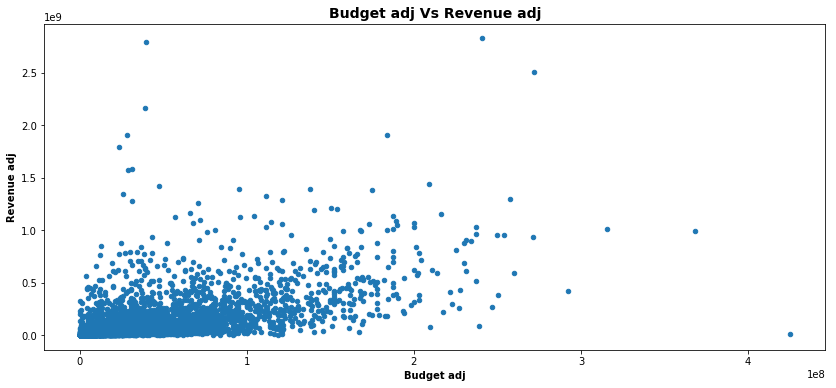

In [63]:
# removing any zero or NAN values in "budget_adj" column
df['budget_adj'] = df['budget_adj'].replace(0, np.NAN)
df.dropna(subset =['budget_adj'], inplace = True)

#Plotting a histogram for Budget adj
HistPlot('budget_adj')

# plotting the relationship between "revenue adj" and "budget_adj"
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', figsize=(14,6));
# Add title and format it
plt.title("Budget adj Vs Revenue adj",fontsize = 14, weight='bold')
# Add x label and format it
plt.xlabel('Budget adj',fontsize = 10, weight='bold')
# Add y label and format it
plt.ylabel('Revenue adj',fontsize = 10, weight='bold');

# finding the correlation between "revenue adj" and "budget_adj"
print('Correlation between "revenue adj" and "budget_adj": ', df.corr().loc['revenue_adj','budget_adj'].round(2)) 

> The scatter plot show that there is a moderate positive relationship between Revenue adj and Budget adj (r = __0.57__ [between 0.5 and 0.7])

### 2- Does 'Popularity' property associate with movies that have high revenues?

#### Exploring 'Popularity' data

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

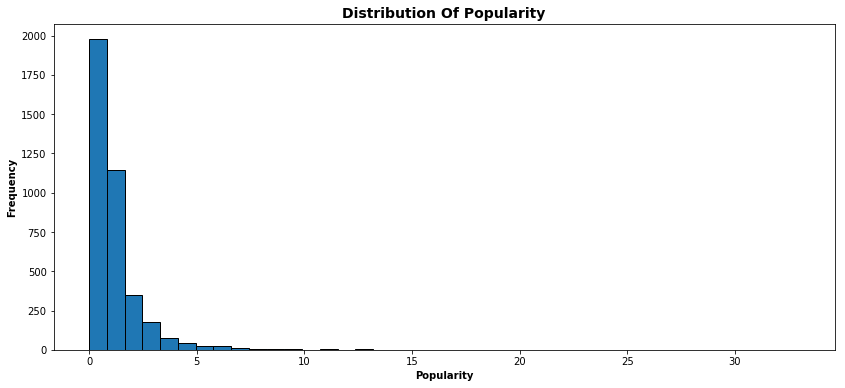

In [64]:
#Plotting a histogram for Popularity
HistPlot('popularity')
df.popularity.describe()

#### Studying the relationship between 'revenue adj' and 'popularity'

Correlation between Revenue adj and Popularity:  0.55


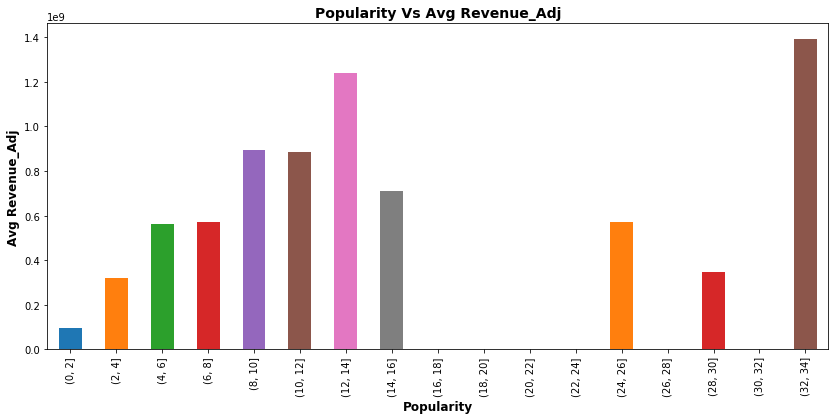

In [65]:

def BarPlot(xvar,yvar,start,stop,step):
    '''
    This function draw a bar plot between two continuous variables, after converting one variable (x var) to a categorical variable.
    '''
    # Converting x var to a categorical variable and plotting the bar chart
    df.groupby(pd.cut(df[xvar], np.arange(start,stop,step))).mean()[yvar].plot(kind='bar', figsize=(14,6));
    # Add title and format it
    plt.title(f'{xvar}'.title() +f' Vs Avg {yvar}'.title(),fontsize = 14,weight='bold')
    # Add x label and format it
    plt.xlabel(xvar.title(),fontsize = 12,weight='bold')
    # Add y label and format it
    plt.ylabel(f'Avg {yvar}'.title(),fontsize = 12,weight='bold');
    
# Plotting a bar chart to show the relationship between Revenue adj and Popularity    
BarPlot('popularity','revenue_adj',0,36,2)

#finding the correlation between Revenue adj and Popularity
print('Correlation between Revenue adj and Popularity: ', df.corr().loc['revenue_adj','popularity'].round(2)) 

> The plot show that there is a positive relationship between Revenue adj and Popularity (r = __0.55__)

### 3- Does 'Release year' property associate with movies that have high revenues?

#### Exploring 'Release year' data

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

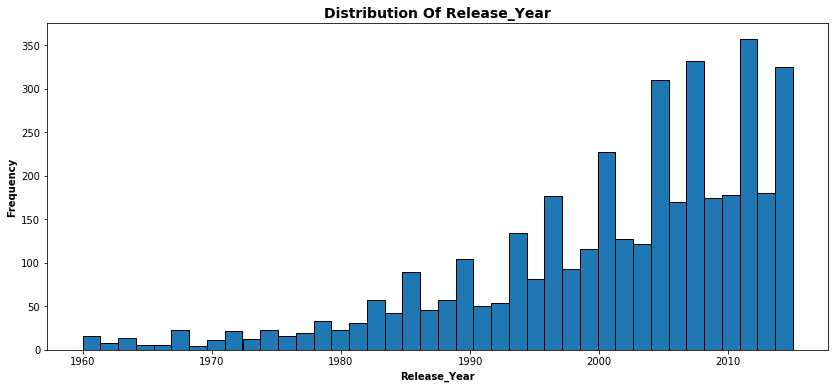

In [66]:
# Plotting a histogram for Release year
HistPlot('release_year')
df.release_year.describe()

#### Studying the relationship between 'revenue adj' and 'release year'

Correlation between Revenue adj and Release year:  -0.1


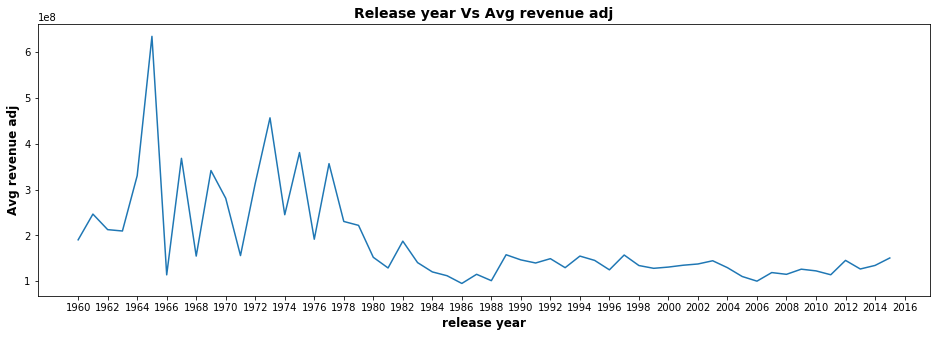

In [67]:
#plotting the relationship between Revenue adj and Release year
df.groupby('release_year').mean()['revenue_adj'].plot(xticks = np.arange(1960,2018,2), figsize=(16,5));
# Add title and format it
plt.title("Release year Vs Avg revenue adj",fontsize = 14,weight='bold')
# Add x label and format it
plt.xlabel('release year',fontsize = 12,weight='bold')
# Add y label and format it
plt.ylabel('Avg revenue adj',fontsize = 12,weight='bold');

#finding the correlation between Revenue adj and Release year
print('Correlation between Revenue adj and Release year: ', df.corr().loc['revenue_adj','release_year'].round(2)) 

> From the chart, we can see that:
> The Avg Revenue adj was the largest possible between __1964__ and __1966__, then __decreased__ after that and kept swinging until it __decreased__ again in __1978__ and remained almost constant until 2015


### 4- Does 'Vote average' property associate with movies that have high revenues?

#### Exploring 'Vote average' data

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

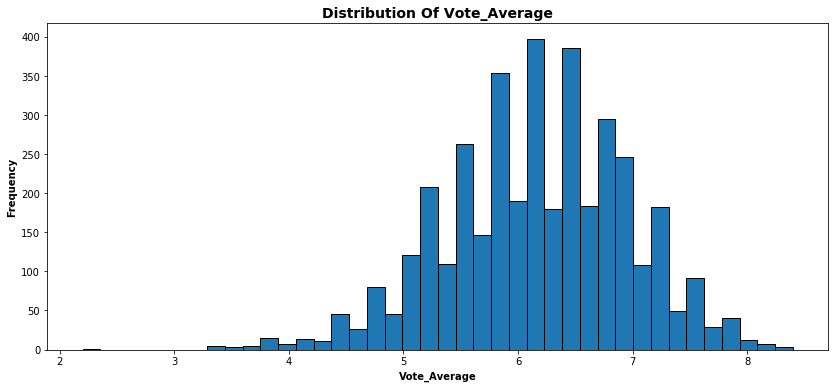

In [68]:
# Plotting a histogram for Vote average
HistPlot('vote_average')
df.vote_average.describe()

#### Studying the relationship between 'revenue adj' and 'Vote average'

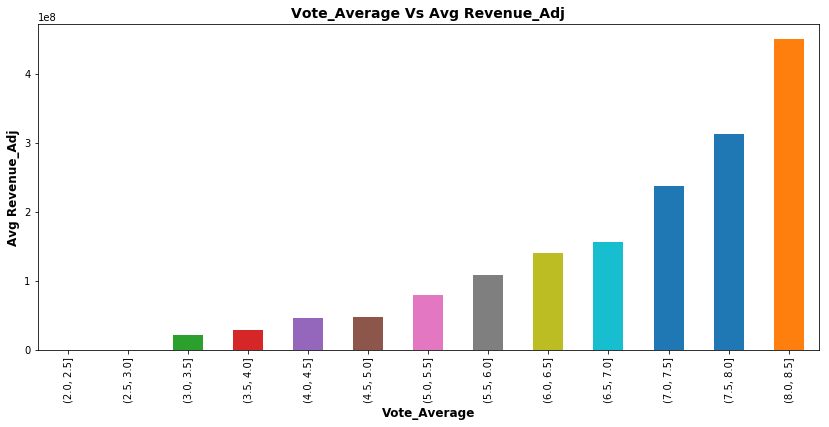

In [69]:
# Plotting a bar chart to show the relationship between Revenue adj and Vote average
BarPlot('vote_average','revenue_adj',2,9,0.5)

> The bar plot show that there is a positive relationship between Revenue adj and Vote average

<a id='conclusions'></a>
## Conclusions  
> 1- There is a moderate positive relationship between Revenue adj and Budget adj (r = 0.57)  
> 2- There is a moderate positive relationship between Revenue adj and Popularity (r = 0.55)  
> 3- 'Release year' property is not associated with movies that have high revenues.  
> 4- There is a positive relationship between Revenue adj and Vote average

> So we can conclude that '__Popularity__', '__Budget adj__' and '__Vote average__' properties are associated with movies that have high revenues.

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0